In [1]:
%matplotlib inline
#dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
import scipy.stats as sts
#read CSV files
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [2]:
#Read city data file and store into pd.DataFrame()
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [3]:
#read ride data and store into pd.DataFrame()
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [4]:
#get data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [5]:
#get unique values of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [6]:
#get number of data points from urban cities
sum(city_data_df['type']=='Urban')

66

In [7]:
#get all columns and rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [8]:
#(another way to get not null columns and rows)
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [9]:
#get data types for each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [10]:
#combine data into single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on=["city","city"])
#display DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [11]:
#create the Urban City DataFrame
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
#create Suburban cities DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [13]:
#create Rural cities DataFrame
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [14]:
#Get the number for rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [15]:
#Get the number of rides for Suburban Cities.
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [16]:
#Get the number of rides for Rural Cities.
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [17]:
#Get the average fare for each city in urban cities
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [18]:
#Get the average fare for suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [19]:
#Get the average fare for rural cities.
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [20]:
#get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [21]:
#get the average number of drivers for each suburban city.
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [22]:
#get the average number of drivers for each rural city.
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

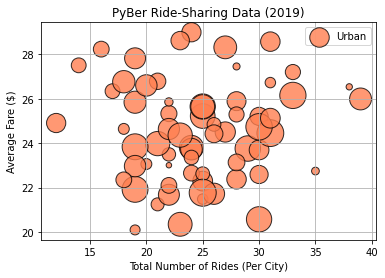

In [23]:
#build scatter polot for urban cities
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_driver_count, edgecolor = 'k', color = 'coral',
            alpha=.8, label = 'Urban', linewidths=1,)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.legend()
plt.grid(True)

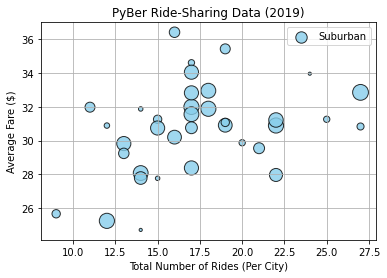

In [24]:
#scatter plot for ubran cities
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count,
            c='Skyblue',edgecolor = 'k',linewidths = 1, alpha=.8, label='Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

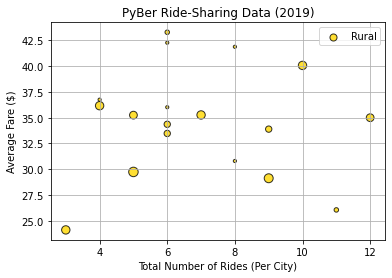

In [25]:
#scatter plot for rural cities
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count,
            c='gold',edgecolor='k',linewidths = 1, alpha=.8, label='Rural')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

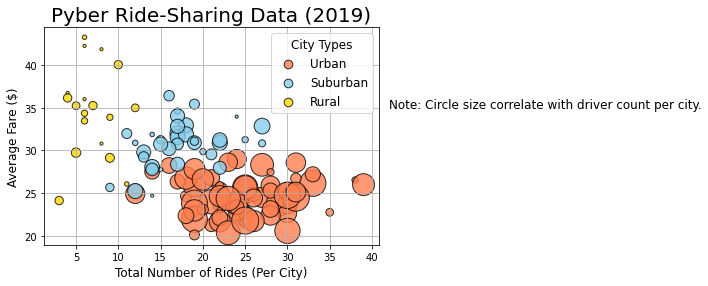

In [26]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
#add other graph properties
plt.title("Pyber Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid(True)
#create a legend
lgnd = plt.legend(fontsize='12', mode='Expanded',
                  scatterpoints=1, loc="best", title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
#incorporate text label about circle sizes.
plt.text(42,35, 'Note: Circle size correlate with driver count per city.', fontsize = '12')
#save the figure
plt.savefig("analysis/Fig1.png")
# Show the plot
plt.show()

In [27]:
#get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [28]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [29]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [30]:
#get summary stats for rides
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [31]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [32]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [33]:
#calculate mean of the ride count for each city type (another describe)
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [34]:
#median ride amount
urban_ride_count.median()

24.0

In [35]:
#calculate mode of ride count in urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [36]:
suburban_ride_count.mode()

0    17
dtype: int64

In [38]:
#calculate measures of central tendency for ride count in urban suburban and rural cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"the mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
median_urban_ride_count = np.median(urban_ride_count)
print(f"the median for the ride counts for urban trips is {median_urban_ride_count}.")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

the mean for the ride counts for urban trips is 24.62.
the median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [39]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"the mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")
median_suburban_ride_count = np.median(suburban_ride_count)
print(f"the mean for the ride counts for suburban trips is {median_suburban_ride_count}.")
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"the mean for the ride counts for suburban trips is {mode_suburban_ride_count}.")

the mean for the ride counts for suburban trips is 17.36.
the mean for the ride counts for suburban trips is 17.0.
the mean for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [40]:
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"the mean for the ride counts for urban trips is {mean_rural_ride_count:.2f}.")
median_rural_ride_count = np.median(rural_ride_count)
print(f"the mean for the ride counts for suburban trips is {median_rural_ride_count}.")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"the mean for the ride counts for suburban trips is {mode_rural_ride_count}.")

the mean for the ride counts for urban trips is 6.94.
the mean for the ride counts for suburban trips is 6.0.
the mean for the ride counts for suburban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [41]:
#get the fare for urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [45]:
#calculate measure of central tendency for average far in urban cities
mean_urban_fares = np.mean(urban_fares)
print(f'the mean fare price for urban trips is ${mean_urban_fares:.2f}.')
median_urban_fares = np.median(urban_fares)
print(f'the median fare price for urban trips is ${median_urban_fares:.2f}.')
mode_urban_fares = sts.mode(urban_fares)
print(f'the mode fare price for urban trips is {mode_urban_fares}.')

the mean fare price for urban trips is $24.53.
the median fare price for urban trips is $24.64.
the mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [46]:
suburban_fares = suburban_cities_df['fare']

In [47]:
mean_suburban_fares = np.mean(suburban_fares)
print(f'the mean fare price for suburban trips is ${mean_suburban_fares:.2f}.')
median_suburban_fares = np.median(suburban_fares)
print(f'the median fare price for suburban trips is ${median_suburban_fares:.2f}.')
mode_suburban_fares = sts.mode(suburban_fares)
print(f'the mode fare price for suburban trips is {mode_suburban_fares}.')

the mean fare price for urban trips is $30.97.
the median fare price for urban trips is $30.75.
the mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [48]:
rural_fares = rural_cities_df['fare']

In [49]:
mean_rural_fares = np.mean(rural_fares)
print(f'the mean fare price for rural trips is ${mean_rural_fares:.2f}.')
median_rural_fares = np.median(rural_fares)
print(f'the median fare price for rural trips is ${median_rural_fares:.2f}.')
mode_rural_fares = sts.mode(rural_fares)
print(f'the mode fare price for rural trips is {mode_rural_fares}.')

the mean fare price for rural trips is $34.62.
the median fare price for rural trips is $37.05.
the mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [50]:
#get driver count data from urban cities
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [54]:
mean_urban_drivers = np.mean(urban_drivers)
print(f' mean of urban drivers is {mean_urban_drivers:.2f}.')
median_urban_drivers = np.median(urban_drivers)
print(f' median of urban drivers is {median_urban_drivers:.2f}.')
mode_urban_drivers = sts.mode(urban_drivers)
print(f' mode of urban drivers is {mode_urban_drivers}.')

 mean of urban drivers is 36.68.
 median of urban drivers is 37.00.
 mode of urban drivers is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [55]:
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [56]:
mean_suburban_drivers = np.mean(suburban_drivers)
print(f' mean of suburban drivers is {mean_suburban_drivers:.2f}.')
median_suburban_drivers = np.median(suburban_drivers)
print(f' median of suburban drivers is {median_suburban_drivers:.2f}.')
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f' mode of suburban drivers is {mode_suburban_drivers}.')

 mean of suburban drivers is 13.71.
 median of suburban drivers is 16.00.
 mode of suburban drivers is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [58]:
rural_drivers = rural_cities_df['driver_count']

In [59]:
mean_rural_drivers = np.mean(rural_drivers)
print(f' mean of rural drivers is {mean_rural_drivers:.2f}.')
median_rural_drivers = np.median(rural_drivers)
print(f' median of rural drivers is {median_rural_drivers:.2f}.')
mode_rural_drivers = sts.mode(rural_drivers)
print(f' mode of rural drivers is {mode_rural_drivers}.')

 mean of rural drivers is 4.30.
 median of rural drivers is 4.00.
 mode of rural drivers is ModeResult(mode=array([1], dtype=int64), count=array([32])).


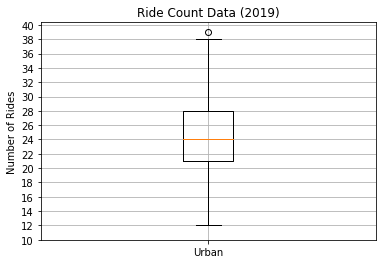

In [62]:
#create a box and whisker plot for urban cities ride count
x_labels = ['Urban']
fix, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
#add title, y axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,42, step=2.0))
ax.grid()
plt.show()

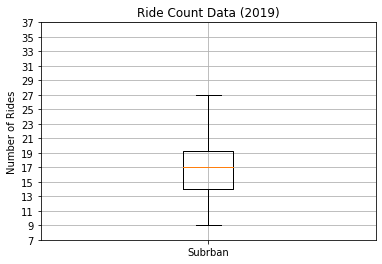

In [63]:
#create a box and whisker plot for urban cities ride count
x_labels = ['Subrban']
fix, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
#add title, y axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(7,39, step=2.0))
ax.grid()
plt.show()

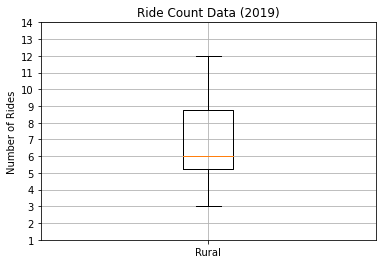

In [65]:
#create a box and whisker plot for urban cities ride count
x_labels = ['Rural']
fix, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
#add title, y axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(1,15, step=1.0))
ax.grid()
plt.show()

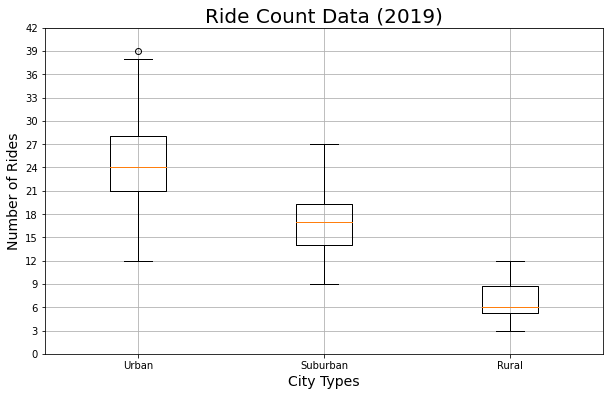

In [66]:
# add all ride count box and whisker plots to same graph 
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count,suburban_ride_count,rural_ride_count]
fix, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize = 14)
ax.set_xlabel('City Types', fontsize = 14)
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()
#save figure
plt.savefig("analysis/fig2.png")
plt.show()

In [67]:
#get the city that matches the outlier (39)
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


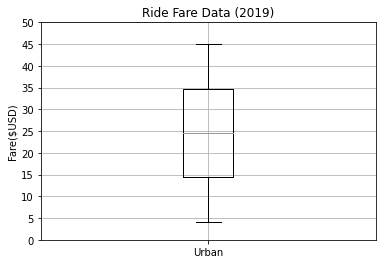

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [68]:
#create a box plot for urban fare data
x_labels = ["Urban"]
fix, ax= plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
#add title etc
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

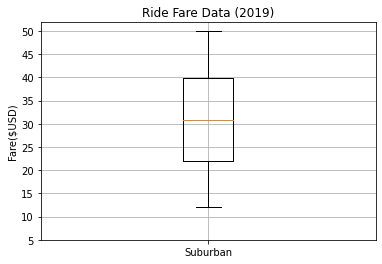

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [73]:
#create a box plot for urban fare data
x_labels = ["Suburban"]
fix, ax= plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
#add title etc
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(5, 55, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

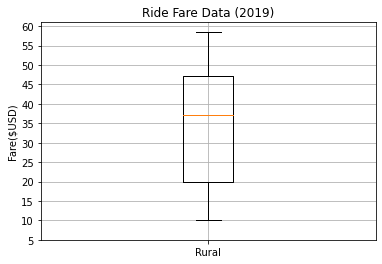

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [74]:
#create a box plot for urban fare data
x_labels = ["Rural"]
fix, ax= plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
#add title etc
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(5, 61, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

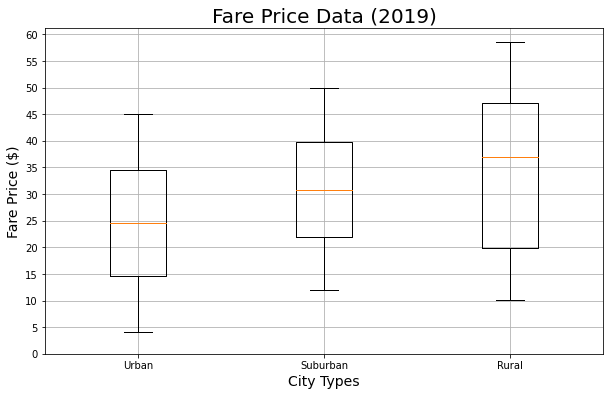

In [75]:
# add all ride count box and whisker plots to same graph 
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_fares,suburban_fares,rural_fares]
fix, ax = plt.subplots(figsize=(10,6))
ax.set_title('Fare Price Data (2019)', fontsize=20)
ax.set_ylabel('Fare Price ($)', fontsize = 14)
ax.set_xlabel('City Types', fontsize = 14)
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_yticks(np.arange(0,62, step=5.0))
ax.grid()
#save figure
plt.savefig("analysis/fig3.png")
plt.show()

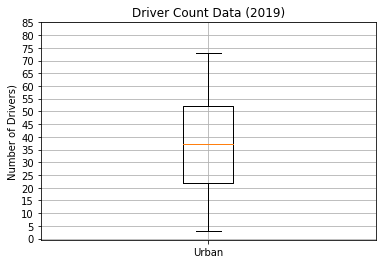

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [76]:
#create box plot for urban driver counts
x_labels=["Urban"]
fix, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)
#add title etc
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

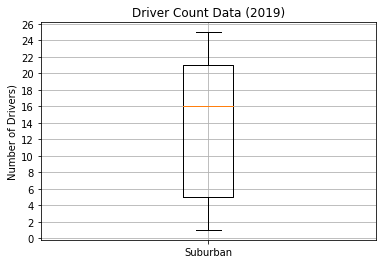

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [81]:
#create box plot for urban driver counts
x_labels=["Suburban"]
fix, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)
#add title etc
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 27, step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

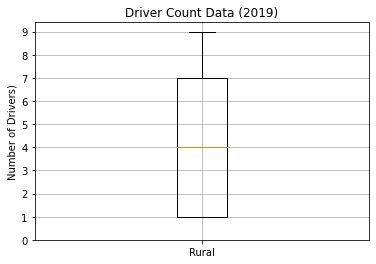

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [84]:
#create box plot for urban driver counts
x_labels=['Rural']
fix, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)
#add title etc
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 10, step=1.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

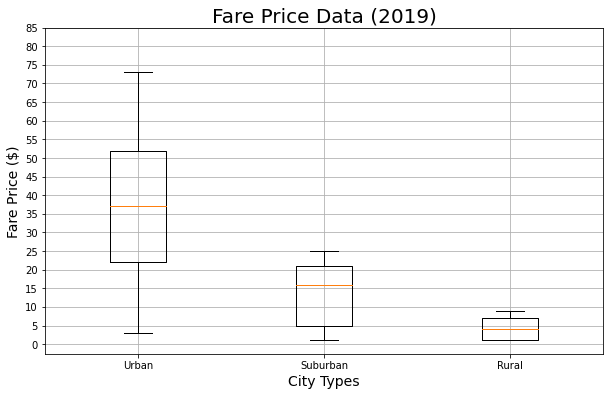

In [88]:
# add all ride count box and whisker plots to same graph 
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_drivers,suburban_drivers,rural_drivers]
fix, ax = plt.subplots(figsize=(10,6))
ax.set_title('Fare Price Data (2019)', fontsize=20)
ax.set_ylabel('Fare Price ($)', fontsize = 14)
ax.set_xlabel('City Types', fontsize = 14)
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_yticks(np.arange(0,90, step=5.0))
ax.grid()
#save figure
plt.savefig("analysis/fig4.png")
plt.show()

In [90]:
#get fare by city type
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [91]:
#get total fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [92]:
#calculate percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [93]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

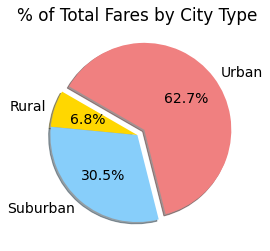

In [97]:
import matplotlib as mpl

plt.pie(type_percents, labels = ['Rural', 'Suburban', 'Urban'], 
        colors = ['gold', 'lightskyblue', 'lightcoral'], explode = [0,0,0.1],
        autopct = '%1.1f%%', shadow=True, startangle = 150)
plt.title("% of Total Fares by City Type")
#change fontsize from 10 to 14
mpl.rcParams['font.size'] = 14
plt.savefig('analysis/fig5.png')
plt.show()

In [99]:
pyber_data_df.groupby(['type']).count()['ride_id']

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [100]:
ride_percents = 100 * pyber_data_df.groupby(['type']).count()['ride_id']/pyber_data_df['ride_id'].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

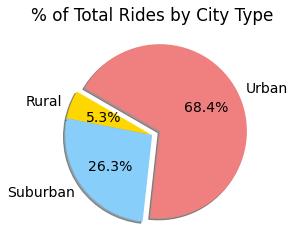

In [102]:
plt.pie(ride_percents, labels = ['Rural', 'Suburban', 'Urban'], 
        colors = ['gold', 'lightskyblue', 'lightcoral'], explode = [0,0,0.1],
        autopct = '%1.1f%%', shadow=True, startangle = 150)
plt.title("% of Total Rides by City Type")
#change fontsize from 10 to 14
mpl.rcParams['font.size'] = 14
plt.savefig('analysis/fig6.png')
plt.show()

In [107]:
#get drivers by city type
driver_percent = 100 * city_data_df.groupby(['type']).sum()['driver_count']/city_data_df['driver_count'].sum()
driver_percent

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

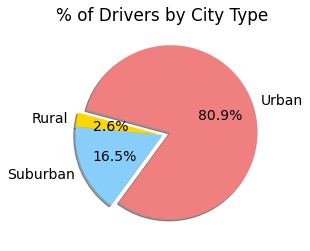

In [108]:
plt.pie(driver_percent, labels = ['Rural', 'Suburban', 'Urban'], 
        colors = ['gold', 'lightskyblue', 'lightcoral'], explode = [0,0,0.1],
        autopct = '%1.1f%%', shadow=True, startangle = 165)
plt.title("% of Drivers by City Type")
#change fontsize from 10 to 14
mpl.rcParams['font.size'] = 14
plt.savefig('analysis/fig7.png')
plt.show()